# Nike Senior Data Scientist, Commercial Analytics

There are 3 input files:
- Some sales data (category_sales.csv)
- Date dimension (date_dim.csv)
- Some store attributes (store_lookup.csv)

Please complete the following steps in order.  Use R and/or Python and be prepared to show your work and share your approach and code with the team.

1) Create a summary table that matches summary_tbl.csv.

2) Some stores are missing "running_sales" data. Where missing, fill in those months with your best prediction using any of data in the csv files.

3) Using any of the data in the .csv files, for each store identify the most similar store(s).

Note: Points are given for the most simple, elegant solution. Feel free to spend up to 3 hours on it, but remember that we're really just looking to assess how you approach everyday problems not how many angles you explore

## Problem #1: Create a summary table that matches `summary_tbl.csv`

First, we should take view our input files to understand what data we have and describe what it looks like.  We'll do this by printing and describing `summary_tbl.csv` along with each input file.

In [18]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

summary_df = pd.read_csv('summary_tbl.csv')

print(summary_df)
print(summary_df.info())

  channel_rollup  rtl_yr  avg_running_sales  tot_running
0            NFS    2016          280563.01 101002684.57
1            NFS    2017          284254.62 102331664.19
2            NFS    2018          303246.47 103710293.67
3            NSO    2016          302443.48  36293218.03
4            NSO    2017          291455.14  34974617.36
5            NSO    2018          261645.76  29827616.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_rollup     6 non-null      object 
 1   rtl_yr             6 non-null      int64  
 2   avg_running_sales  6 non-null      float64
 3   tot_running        6 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes
None


So, in the `summary_tbl.csv` file, we have 6 records with 4 columns each `channel_rollup`, `rtl_yr`, `avg_running_sales`, and `tot_running`.  In other words, for the "channel rollup" values of NFS and NSO we want the average and total annual running sales per year from 2016-2018.

Let's now do the same thing for our input files.

In [20]:
sales_df = pd.read_csv('category_sales.csv')
date_df = pd.read_csv('date_dim.csv')
store_df = pd.read_csv('store_lookup.csv')

print("---- SALES DATA ----")
print(sales_df)
print(sales_df.describe())
print(sales_df.info(), '\n')
print("---- DATE DATA ----")
print(date_df)
print(date_df.describe())
print(date_df.info(), '\n')
print("---- STORE DATA ----")
print(store_df)
print(store_df.describe())
print(store_df.info(), '\n')

---- SALES DATA ----
      str_id  month_key  running_sales  sportswear_sales  training_sales  \
0          1          1      500988.54         420790.56       611630.76   
1          1          2      802806.07         628768.56       962326.44   
2          1          3      795011.77         618587.23       906697.87   
3          1          4      642108.01         501172.99       682245.37   
4          1          5      460465.45         363220.74       563026.68   
...      ...        ...            ...               ...             ...   
1435      40         32       55595.87          57513.94        29369.69   
1436      40         33       64041.39          61676.72        26822.77   
1437      40         34            nan          78863.28        26685.67   
1438      40         35            nan         115737.43        45359.71   
1439      40         36            nan          96254.45        33986.54   

      bball_sales  tennis_sales  skate_sales  cleate_sales  
0    

We find many useful pieces of information here and can confirm we have all the fields we need.

The next steps we'll need to create a summarized table like `summary_tbl.csv` are the following:
- join store data with sales data on the field `str_id`, adding `channel_rollup` to the sales table.
- join date data with sales data on the field `month_key`, adding `rtl_yr` to the sales table.
- group the sales table by `channel_rollup` and `rtl_yr` to populate the average, and total sum of `running_sales` for each group

Let's start by joining the store and date data with the sales data, and remove the columns we won't need.

In [22]:
combined_df = pd.merge(sales_df, store_df, how='left', on="str_id")
combined_df = pd.merge(combined_df, date_df, how='left', on="month_key")

print(combined_df.head())
print(combined_df.info())

   str_id  month_key  running_sales  sportswear_sales  training_sales  \
0       1          1      500988.54         420790.56       611630.76   
1       1          2      802806.07         628768.56       962326.44   
2       1          3      795011.77         618587.23       906697.87   
3       1          4      642108.01         501172.99       682245.37   
4       1          5      460465.45         363220.74       563026.68   

   bball_sales  tennis_sales  skate_sales  cleate_sales        str_nm  \
0    312759.66     136084.74     69954.36     146974.74  LEGEND-CHAMP   
1    484077.30     173718.48     85150.02     212340.30  LEGEND-CHAMP   
2    520536.36     121829.40    126814.32     160664.22  LEGEND-CHAMP   
3    347394.66      99236.82     87710.52     111974.10  LEGEND-CHAMP   
4    302294.28      52665.00     70746.12      52752.12  LEGEND-CHAMP   

  channel_rollup  rtl_yr  rtl_mo_nbr rtl_mo_strt_dt  
0            NFS    2016           1        5/31/15  
1            N

At this point, we have the `running_sales` for each entry in our sales tables along with the `channel_rollup` and `rtl_yr`.  The final step is to group the sales table as mentioned before.

In [24]:
combined_summary = combined_df.groupby(
                    ["channel_rollup", "rtl_yr"]).agg(
                    avg_running_sales=("running_sales", 'mean'), 
                    tot_running=("running_sales", 'sum')).reset_index()
print("---- CREATED SUMMARY TABLE ----")
print(combined_summary)
print("---- GIVEN SUMMARY TABLE ----")
print(summary_df)
print("---- DIFFERENCE AVG RUNNING SALES ----")
print(combined_summary["avg_running_sales"] - summary_df["avg_running_sales"])
print("---- DIFFERENCE TOTAL RUNNING SALES ----")
print(combined_summary["tot_running"] - summary_df["tot_running"])

---- CREATED SUMMARY TABLE ----
  channel_rollup  rtl_yr  avg_running_sales  tot_running
0            NFS    2016          280563.01 101002684.57
1            NFS    2017          284254.62 102331664.19
2            NFS    2018          303246.47 103710293.67
3            NSO    2016          284992.85  37619055.82
4            NSO    2017          275341.03  36345015.55
5            NSO    2018          245022.97  30872894.58
---- GIVEN SUMMARY TABLE ----
  channel_rollup  rtl_yr  avg_running_sales  tot_running
0            NFS    2016          280563.01 101002684.57
1            NFS    2017          284254.62 102331664.19
2            NFS    2018          303246.47 103710293.67
3            NSO    2016          302443.48  36293218.03
4            NSO    2017          291455.14  34974617.36
5            NSO    2018          261645.76  29827616.10
---- DIFFERENCE AVG RUNNING SALES ----
0        0.00
1        0.00
2       -0.00
3   -17450.64
4   -16114.12
5   -16622.78
Name: avg_running

After grouping by `channel_rollup` and `rtl_yr` and calculating the annual average and total running sales, it seems there are some discrepancies with the summary table `summary_tbl.csv`.

There are a number of things that could be driving this, including the presence of outliers, poor data quality, rounding errors, or some imputation method being used on missing values in `summary_tbl.csv` that wasn't explained.  

Because we saw many NaN/NULL values in the `running_sales` field, it may be worth communicating these findings to discover if the creator of `summary_tbl.csv` used some imputation method that wasn't disclosed.

# Problem #2: Some stores are missing `running_sales` data. Where missing, fill in those months with your best prediction using any of data in the csv files.

Before imputing any missing values, it is important to understand how much data is missing and where the missing data lies in the time series, and to visualize the data to understand if there is any trend or seasonality to consider, in order to determine the best imputation methods.

But first, let's reduce the scope to only the stores with missing values.  In order to make our plot more legible, we'll filter our combined dataframe down to include only these store with missing values.

In [26]:
combined_df["rtl_mo_strt_dt"] = pd.to_datetime(combined_df["rtl_mo_strt_dt"])
missing_strs = combined_df[combined_df["running_sales"].isna()]["str_id"].unique()
print("Store IDs with missing values:", missing_strs)

combined_w_missing = combined_df[combined_df["str_id"].isin(missing_strs)]
keep_cols = ["str_id", "rtl_mo_strt_dt", "running_sales"]
combined_w_missing = combined_w_missing[keep_cols]
print(combined_w_missing)
print(combined_w_missing.info())

grouped_missing = combined_w_missing.groupby("rtl_mo_strt_dt").agg('count')
print(grouped_missing)

Store IDs with missing values: [ 5 10 15 20 25 30 35 40]
      str_id rtl_mo_strt_dt  running_sales
144        5     2015-05-31      464530.12
145        5     2015-06-28      663794.83
146        5     2015-08-02      496429.34
147        5     2015-08-30      420169.94
148        5     2015-09-27      466289.70
...      ...            ...            ...
1471      40     2017-12-31       55595.87
1472      40     2018-02-04       64041.39
1473      40     2018-03-04            nan
1474      40     2018-04-01            nan
1475      40     2018-05-06            nan

[288 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 144 to 1475
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   str_id          288 non-null    int64         
 1   rtl_mo_strt_dt  288 non-null    datetime64[ns]
 2   running_sales   264 non-null    float64       
dtypes: datetime64[ns](1), float64(1

We can gather that of the 8 stores with missing data, 24 of 288 (< 10%) running sales data are missing.  In fact, the only missing values are for the last 3 months of the time period.  If we visualize the `running_sales` for each of these store over time, you may notice that the the last month captured in the data for these stores is Feb. 2018.

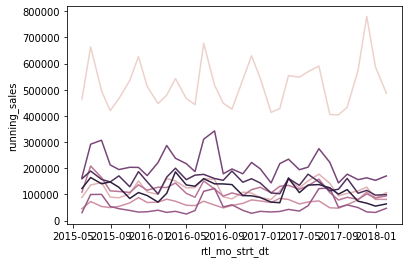

In [27]:
import seaborn as sns

store_lnplt = sns.lineplot(x="rtl_mo_strt_dt", y="running_sales", hue="str_id", data=combined_w_missing, legend=False)

Additionally, by visualizing `running_sales` for these stores over time, you can notice seasonal compononents to sales for most stores, which makes imputing methods such as mean, median, or mode poor predictors.  Additionally, it seems that not all stores follow the same seasonal patterns.

Because we want the *best* prediction for missing values while also a simple solution, we'll choose to use Facebook's *Prophet* library that works well with time series data and accounts for trend, seasonal components, and holidays.  We will do this to each store.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dates to fill: ['2018-03-04T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-06T00:00:00.000000000']


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04 294108.57   257843.02   333959.91
1 2018-04-01 609588.18   570759.05   648999.52
2 2018-05-06 702094.52   664736.27   739017.40


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04 169343.51   155722.58   182826.36
1 2018-04-01 116044.11   101734.23   129658.65
2 2018-05-06 207089.94   192561.98   219908.30


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04  63488.79    59978.21    67332.84
1 2018-04-01  83192.21    79520.10    86705.14
2 2018-05-06 115472.73   111841.52   119257.57


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04  81550.80    68633.33    95647.04
1 2018-04-01 191231.43   178545.77   204103.27
2 2018-05-06 116187.64   102335.54   128863.99


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds     yhat  yhat_lower  yhat_upper
0 2018-03-04 45725.26    40207.78    50934.05
1 2018-04-01 51915.09    46718.59    57618.56
2 2018-05-06 51745.34    46348.16    56954.97


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04 252328.92   233605.65   273612.92
1 2018-04-01  98247.97    77142.98   118715.92
2 2018-05-06 319078.69   298728.77   340967.13


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04 115079.02   100132.41   131024.82
1 2018-04-01 161354.92   146453.55   176685.71
2 2018-05-06 175802.32   160316.81   190569.68
          ds      yhat  yhat_lower  yhat_upper
0 2018-03-04  59819.88    52396.66    66629.53
1 2018-04-01 137021.11   129485.54   144441.59
2 2018-05-06 163433.13   156091.10   170447.10


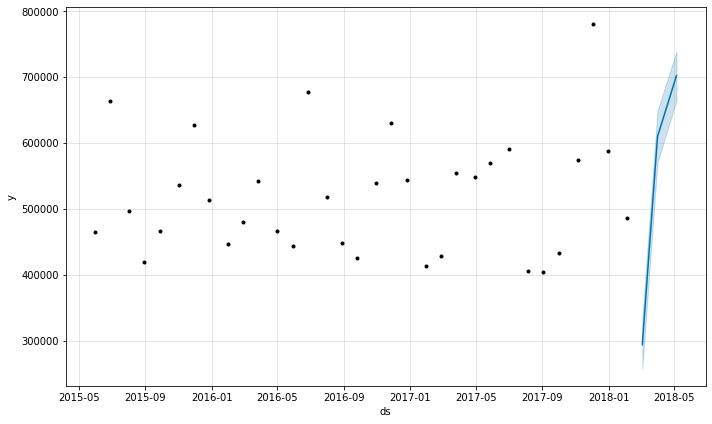

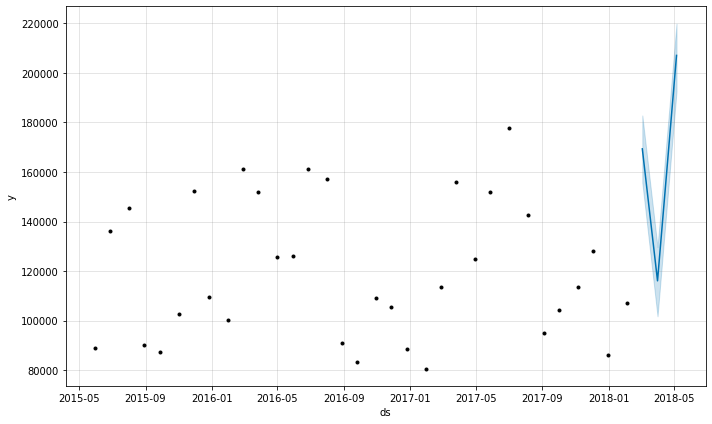

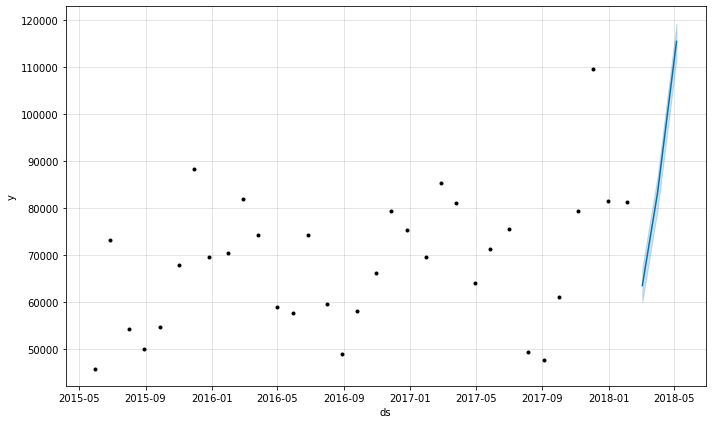

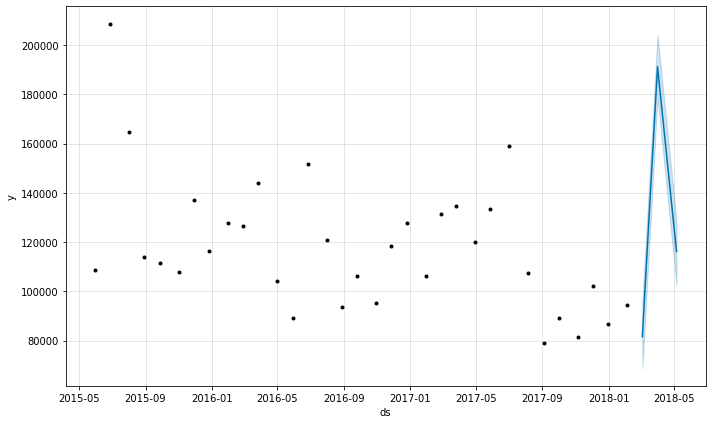

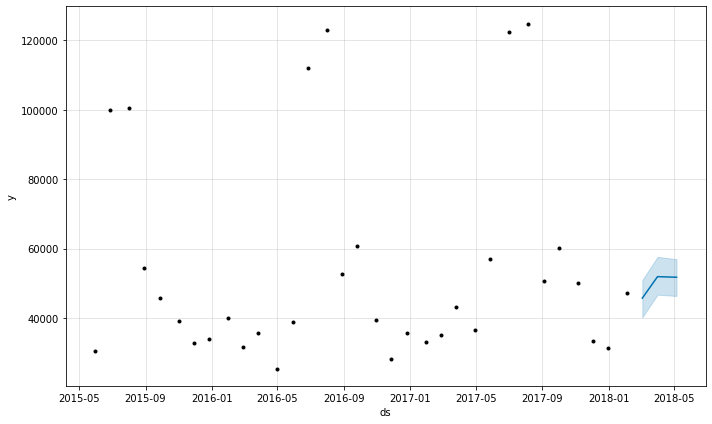

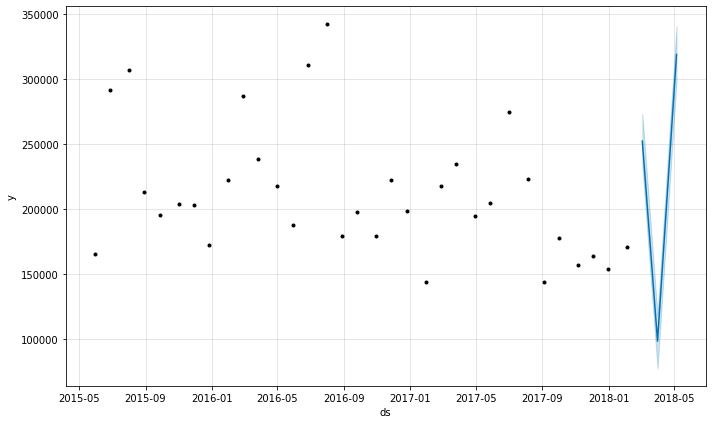

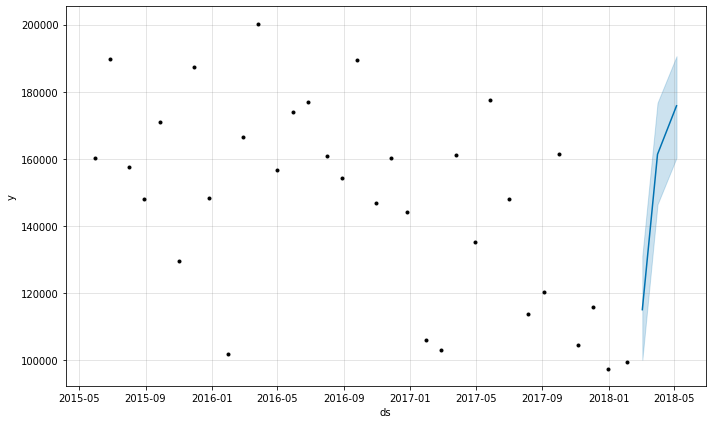

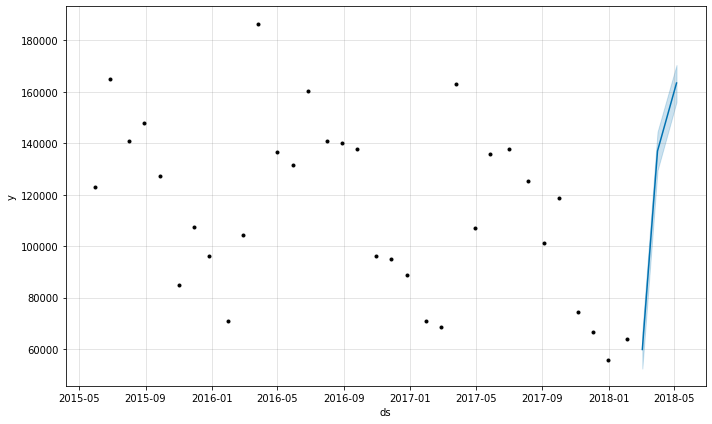

In [29]:
from fbprophet import Prophet

# dates to predict with missing values
missing_data = combined_w_missing[combined_w_missing["running_sales"].isna()]
dates_to_fill = missing_data["rtl_mo_strt_dt"].unique()
print("Dates to fill:", dates_to_fill)
# use non-null values to train time series model
training_df = combined_w_missing.dropna()

future_df = pd.DataFrame(columns=keep_cols)
# Iterate through 8 stores:
for store in missing_strs:
    
    # fit time series model
    pred_ds = pd.DataFrame({"ds": dates_to_fill})
    model = Prophet()
    str_df = training_df[training_df["str_id"]==store]
    str_df = str_df.drop("str_id", 1)
    str_df.columns = ["ds", "y"]
    model.fit(str_df)
    
    # predict on future dates
    pred = model.predict(pred_ds)
    print(pred[["ds", "yhat", "yhat_lower", "yhat_upper"]])
    
    # append predictions to future_df
    pred_df = pred.filter(["ds", "yhat"])
    pred_df.columns = ["rtl_mo_strt_dt", "running_sales"]
    pred_df["str_id"] = store
    future_df = future_df.append(pred_df)
    
    # visualize predictions
    model.plot(pred)

As you can see in the visualizations, Prophet seems to account for the various degrees of seasonality for each store.  Moreover, it provides other useful pieces of information such as trend, lower and upper bounds, and can allow for multiple regressors as a potential extention to the model.  But due to time constraints, there wasn't uch time to thoroughly test the accuracy of different models at different points in time, so we'll move on and assume these predictions are good.

In [36]:
import numpy as np

# fill missing values with predicitons
final_df = pd.merge(combined_df, future_df, on=["str_id", "rtl_mo_strt_dt"], how='left')
final_df["running_sales"] = np.where(final_df["running_sales_x"].isna()
                                     , final_df["running_sales_y"]
                                     , final_df["running_sales_x"])
final_df = final_df.drop(columns=["running_sales_x", "running_sales_y"])
final_df = final_df.sort_values(by=["str_id", "month_key"])

print(final_df)


     str_id  month_key  sportswear_sales  training_sales  bball_sales  \
0         1          1         420790.56       611630.76    312759.66   
1         1          2         628768.56       962326.44    484077.30   
2         1          3         618587.23       906697.87    520536.36   
3         1          4         501172.99       682245.37    347394.66   
4         1          5         363220.74       563026.68    302294.28   
...     ...        ...               ...             ...          ...   
1471     40         32          57513.94        29369.69     48192.13   
1472     40         33          61676.72        26822.77     56813.13   
1473     40         34          78863.28        26685.67     49852.07   
1474     40         35         115737.43        45359.71     70787.36   
1475     40         36          96254.45        33986.54     49993.01   

      tennis_sales  skate_sales  cleate_sales          str_nm channel_rollup  \
0        136084.74     69954.36     146974.

## Problem #3: Using any of the data in the .csv files, for each store identify the most similar store(s).

At this point, it makes sense to group the data from the newly created `final_df` to summarize the data at the store level.  But first, it would be nice to generate some new features here that could help in characterizing the stores better.  I'll only engineer a few features to capture *total sales, sales distribution, and monthly growth rate*.

In [37]:
# remove unuseful columns
final_df["NFS"] = np.where(final_df["channel_rollup"] == "NFS", 1, 0)
del_cols = ["rtl_yr", "rtl_mo_nbr", "str_nm", "channel_rollup", "rtl_mo_strt_dt"]
final_df = final_df.drop(columns=del_cols)

sales_cols = ["sportswear_sales", "training_sales", "bball_sales", "tennis_sales"
              , "skate_sales", "cleate_sales", "running_sales"]
# total sales
final_df["total_sales"] = final_df[sales_cols].sum(axis=1)
# sales distribution by category
for c in sales_cols:
    final_df[c] = final_df[c]/final_df["total_sales"]
# monthly growth rate of total sales
final_df["monthly_growth"] = final_df.groupby(["str_id"])["total_sales"].pct_change()

print(final_df)

     str_id  month_key  sportswear_sales  training_sales  bball_sales  \
0         1          1              0.19            0.28         0.14   
1         1          2              0.19            0.29         0.14   
2         1          3              0.19            0.28         0.16   
3         1          4              0.20            0.28         0.14   
4         1          5              0.19            0.30         0.16   
...     ...        ...               ...             ...          ...   
1471     40         32              0.26            0.13         0.22   
1472     40         33              0.28            0.12         0.26   
1473     40         34              0.35            0.12         0.22   
1474     40         35              0.30            0.12         0.18   
1475     40         36              0.27            0.09         0.14   

      tennis_sales  skate_sales  cleate_sales  running_sales  NFS  \
0             0.06         0.03          0.07         

Now, I would like to summarize all of this data at the store level.

In [38]:
final_df = final_df.drop(columns=["month_key"])
store_summary = final_df.groupby(["str_id"]).mean()
print(store_summary.head())
print(store_summary.describe())

        sportswear_sales  training_sales  bball_sales  tennis_sales  \
str_id                                                                
1                   0.24            0.29         0.13          0.03   
2                   0.29            0.21         0.23          0.02   
3                   0.28            0.22         0.16          0.02   
4                   0.22            0.29         0.08          0.03   
5                   0.29            0.22         0.18          0.00   

        skate_sales  cleate_sales  running_sales  NFS  total_sales  \
str_id                                                               
1              0.02          0.02           0.26    1   2503757.59   
2              0.01          0.02           0.22    1    212677.51   
3              0.02          0.03           0.25    1    909285.29   
4              0.02          0.01           0.34    1    474090.07   
5              0.03          0.02           0.27    1   1933686.99   

        mon

In order to further simplify this problem, I'll drop the sales categories that make up a very small proportion of overall sales.  Also, I'll scale all the columns between 0 and 1 as a pre-processing step, since the unit of measurement and range is not the same for all columns

In [11]:
for col in store_summary.columns:
    store_summary[col] = (store_summary[col] - store_summary[col].min()) / (store_summary[col].max() - store_summary[col].min())

store_summary = store_summary.drop(columns=["tennis_sales", "skate_sales", "cleate_sales"])
print(store_summary.head())

        sportswear_sales  training_sales  bball_sales  running_sales  NFS  \
str_id                                                                      
1                   0.17            1.00         0.49           0.10 1.00   
2                   0.46            0.58         0.87           0.00 1.00   
3                   0.44            0.64         0.62           0.09 1.00   
4                   0.06            0.97         0.32           0.28 1.00   
5                   0.48            0.59         0.68           0.12 1.00   

        total_sales  monthly_growth  
str_id                               
1              0.65            0.06  
2              0.04            0.24  
3              0.22            0.41  
4              0.11            0.58  
5              0.50            0.16  


Instead of breaking the stores into different groups/buckets based on total sales, sales distribution, and average monthly growth rate - I would like to use PCA (Principal Component Analysis) to reduce the number of dimensions.  This will help us in calculating *distance metrics* to compare how similar the stores are to one another.

In order to do this, we'll use the `sklearn` library reduce these 6 features to a 2-dimensional space, then visualize the results to see if we can group these stores later.

[[-0.40166087 -0.06157109]
 [-0.33743854  0.16278303]
 [-0.30897991  0.01315673]
 [-0.3333025  -0.59277743]
 [-0.26234684  0.2307989 ]
 [-0.17136276  0.21820709]
 [-0.37639867 -0.10383106]
 [-0.28277955  0.38564131]
 [-0.33065445  0.22679775]
 [-0.39097064  0.05648582]
 [-0.30116655 -0.04118496]
 [-0.26569367 -0.02919291]
 [-0.17407591 -0.25031166]
 [-0.37602505  0.08976958]
 [-0.33289022 -0.24759071]
 [-0.32543872 -0.20242435]
 [-0.30765882 -0.09624446]
 [-0.39059402 -0.06418701]
 [-0.25787593  0.06041506]
 [-0.19162302  0.21857868]
 [-0.38372613 -0.18339962]
 [-0.18986914 -0.13203755]
 [-0.34696991 -0.28845391]
 [-0.32047734 -0.07561687]
 [-0.43684939 -0.57979579]
 [-0.28576015  0.14937245]
 [-0.2806208   0.19688593]
 [-0.35145064 -0.17241532]
 [-0.29902862  0.12231661]
 [-0.31828509  0.14970449]
 [ 1.11660206 -0.457609  ]
 [ 1.2345542  -0.47345785]
 [ 1.22171017 -0.38987013]
 [ 0.72086523  0.1647095 ]
 [ 1.07058123 -0.62753749]
 [ 0.69708813  0.55049462]
 [ 0.69907634  0.8445832 ]
 

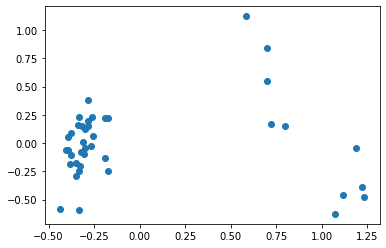

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(store_summary)
store_transformed = pca.transform(store_summary)

print(store_transformed)

plt.scatter(store_transformed[:, 0], store_transformed[:, 1])

It looks like there are 3 main groups that have formed when reducing our features down to only 2 dimensions!

I'll categorize these stores into 3 clusters with the KMeans algorithm.  

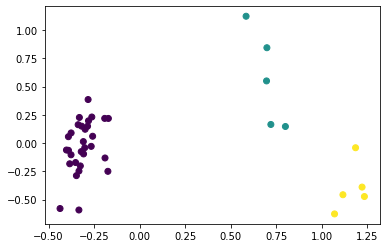

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(store_transformed)

pred_y = km.predict(store_transformed)
plt.scatter(store_transformed[:, 0], store_transformed[:, 1], c=pred_y)

In [14]:
store_summary["group"] = pred_y
print(store_summary)

        sportswear_sales  training_sales  bball_sales  running_sales  NFS  \
str_id                                                                      
1                   0.17            1.00         0.49           0.10 1.00   
2                   0.46            0.58         0.87           0.00 1.00   
3                   0.44            0.64         0.62           0.09 1.00   
4                   0.06            0.97         0.32           0.28 1.00   
5                   0.48            0.59         0.68           0.12 1.00   
6                   0.74            0.56         0.53           0.16 1.00   
7                   0.24            0.80         0.71           0.04 1.00   
8                   0.68            0.51         0.77           0.02 1.00   
9                   0.28            0.70         0.60           0.17 1.00   
10                  0.44            0.70         0.76           0.01 1.00   
11                  0.27            0.56         0.76           0.07 1.00   

In [15]:
group_summary = store_summary.groupby(["group"]).mean()
print(group_summary)

       sportswear_sales  training_sales  bball_sales  running_sales  NFS  \
group                                                                      
0                  0.34            0.70         0.63           0.12 1.00   
1                  0.54            0.14         0.78           0.19 0.00   
2                  0.26            0.17         0.02           0.88 0.00   

       total_sales  monthly_growth  
group                               
0             0.26            0.31  
1             0.40            0.11  
2             0.04            0.10  


It seems that a groups is characterized by:
- a lower proportion of total sales in sportswear, training and basketball categories
- a higher proportion of total sales in running sales
- lower overall sales, and;
- lower average monthly growth

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

train_x, test_x, train_y, test_y = train_test_split(store_summary[[:, :-1]], store_summary[[:, -1]], test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=5)
rf.fit(train_x, train_y)

ypred = rf.predict(test_x)
print(classification_report(ypred, test_y))

SyntaxError: invalid syntax (<ipython-input-17-cdc4671cc8e7>, line 5)